# Import Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("../data/cleaned_book_ratings.csv")
print("Shape:", df.shape)

Shape: (145264, 10)


In [26]:
df.head()

,Unnamed: 0,user_id,isbn,book_rating,location,user_age,title,author,year,publisher
0,13,276747,0060517794,9,"iowa city, iowa, usa",25.0,Little Altars Everywhere,Rebecca Wells,2003,HarperTorch
1,16,276747,0671537458,9,"iowa city, iowa, usa",25.0,Waiting to Exhale,Terry McMillan,1995,Pocket
2,17,276747,0679776818,8,"iowa city, iowa, usa",25.0,Birdsong: A Novel of Love and War,Sebastian Faulks,1997,Vintage Books USA
3,27,276762,0380711524,5,"duisburg, nordrhein-westfalen, germany",25.0,See Jane Run,Joy Fielding,1992,Avon
4,36,276762,3453092007,8,"duisburg, nordrhein-westfalen, germany",25.0,Die zweite Haut.,Dean Koontz,1995,Heyne


# Basic Info

In [ ]:
print("\nMissing values:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)


Missing values:
 Unnamed: 0     0
user_id        0
isbn           0
book_rating    0
location       0
user_age       0
title          0
author         0
year           0
publisher      0
dtype: int64

Data types:
 Unnamed: 0       int64
user_id          int64
isbn            object
book_rating      int64
location        object
user_age       float64
title           object
author          object
year             int64
publisher       object
dtype: object


# EDA

# Ratings Distribution

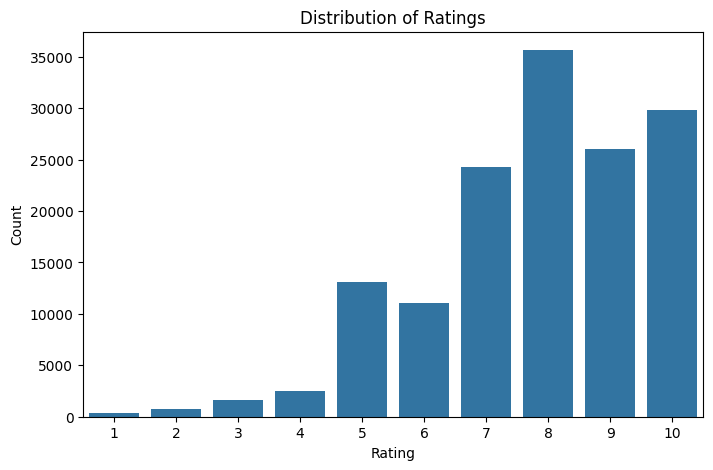

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x="book_rating", data=df)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

# Top 10 Most Rated Books

In [ ]:
top_books = df['title'].value_counts().head(10)
print("\nTop 10 Most Rated Books:\n", top_books)


Top 10 Most Rated Books:
 title
The Lovely Bones: A Novel                            395
The Da Vinci Code                                    303
Wild Animus                                          270
Harry Potter and the Chamber of Secrets (Book 2)     234
Bridget Jones's Diary                                229
Angels &amp; Demons                                  229
The Secret Life of Bees                              228
The Nanny Diaries: A Novel                           216
Life of Pi                                           210
Harry Potter and the Prisoner of Azkaban (Book 3)    204
Name: count, dtype: int64


C:\Users\e\AppData\Local\Temp\ipykernel_11376\3690963647.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_books.index, x=top_books.values, palette="viridis")


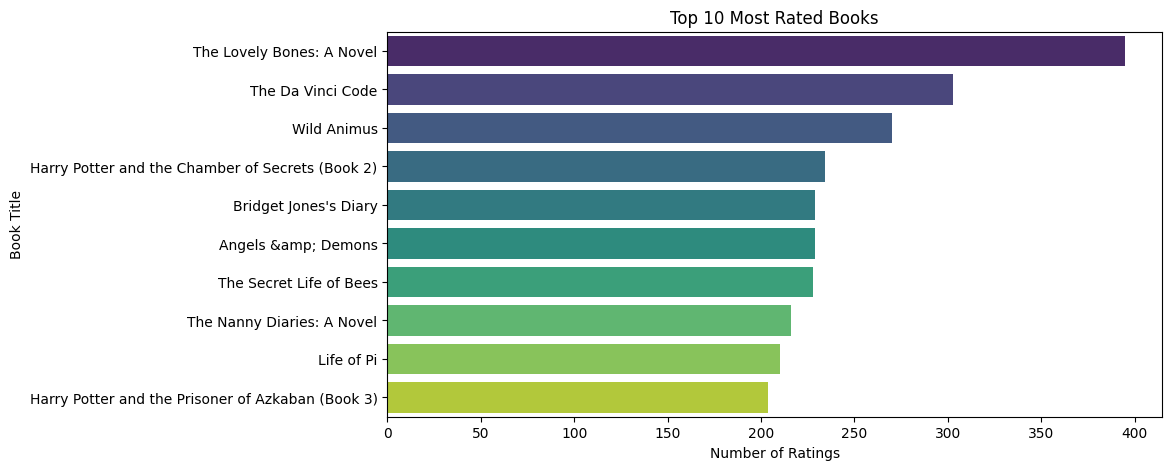

In [30]:
plt.figure(figsize=(10,5))
sns.barplot(y=top_books.index, x=top_books.values, palette="viridis")
plt.title("Top 10 Most Rated Books")
plt.xlabel("Number of Ratings")
plt.ylabel("Book Title")
plt.show()


# Top 10 Authors by Ratings

In [ ]:
top_authors = df['author'].value_counts().head(10)
print("\nTop 10 Authors:\n", top_authors)


Top 10 Authors:
 author
Stephen King          3011
Nora Roberts          1916
John Grisham          1388
James Patterson       1366
J. K. Rowling         1226
Dean R. Koontz         937
Janet Evanovich        900
Anne Rice              867
Mary Higgins Clark     863
Dan Brown              726
Name: count, dtype: int64


# User Age Distribution

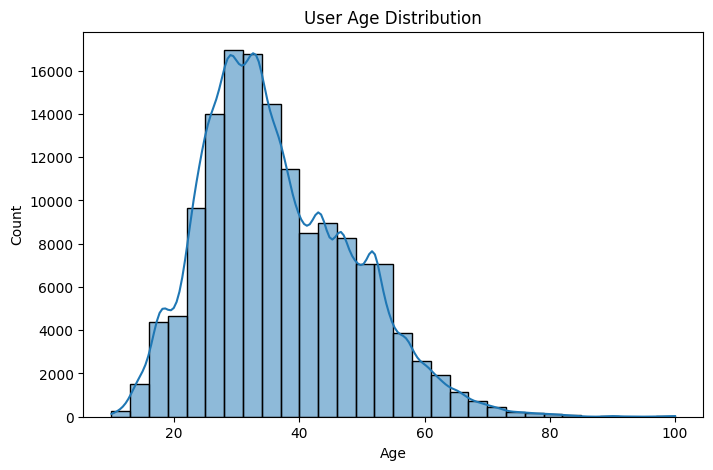

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['user_age'].dropna(), bins=30, kde=True)
plt.title("User Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Average Rating by Year of Publication

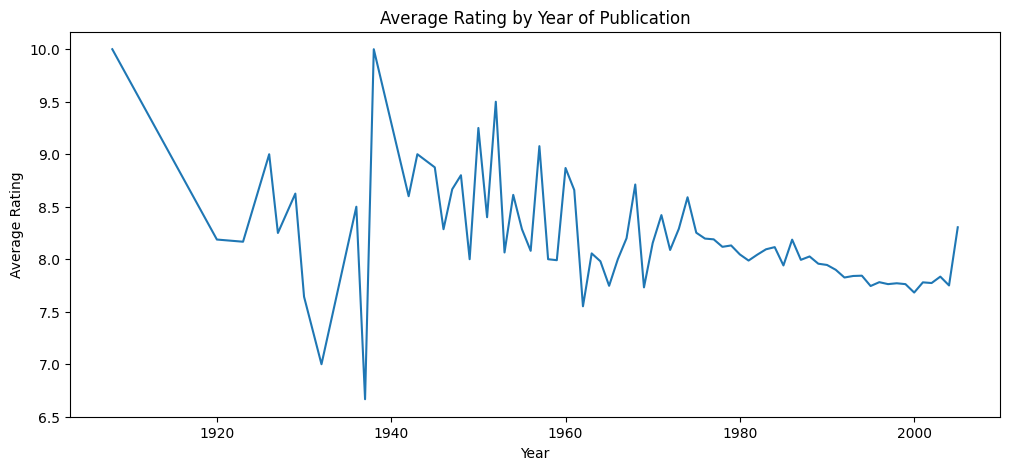

In [ ]:
avg_rating_year = df.groupby("year")["book_rating"].mean().reset_index()
plt.figure(figsize=(12,5))
sns.lineplot(x="year", y="book_rating", data=avg_rating_year)
plt.title("Average Rating by Year of Publication")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.show()

# Top 10 Countries with Most Users

In [ ]:
top_countries = df['location'].value_counts().head(10)
print("\nTop 10 Countries:\n", top_countries)


Top 10 Countries:
 location
toronto, ontario, canada         2462
morrow, georgia, usa             1789
chicago, illinois, usa           1435
ottawa, ontario, canada          1135
mechanicsville, maryland, usa    1119
seattle, washington, usa         1072
portland, oregon, usa            1001
san antonio, texas, usa           875
calgary, alberta, canada          853
st. louis, missouri, usa          839
Name: count, dtype: int64


C:\Users\e\AppData\Local\Temp\ipykernel_11376\1047641188.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_countries.index, x=top_countries.values, palette="crest")


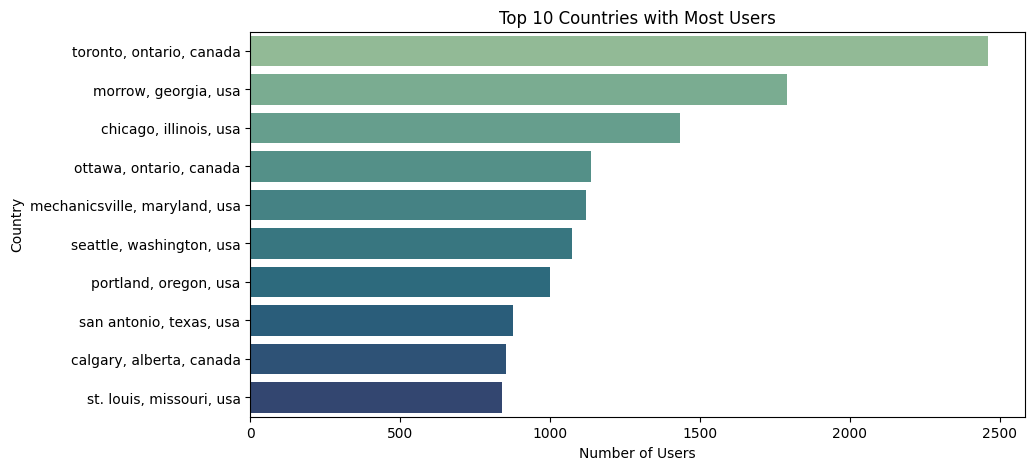

In [38]:
plt.figure(figsize=(10,5))
sns.barplot(y=top_countries.index, x=top_countries.values, palette="crest")
plt.title("Top 10 Countries with Most Users")
plt.xlabel("Number of Users")
plt.ylabel("Country")
plt.show()

# Top 10 Locations by Average Rating

C:\Users\e\AppData\Local\Temp\ipykernel_11376\1187482949.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=avg_rating_loc.index, x=avg_rating_loc.values, palette="flare")


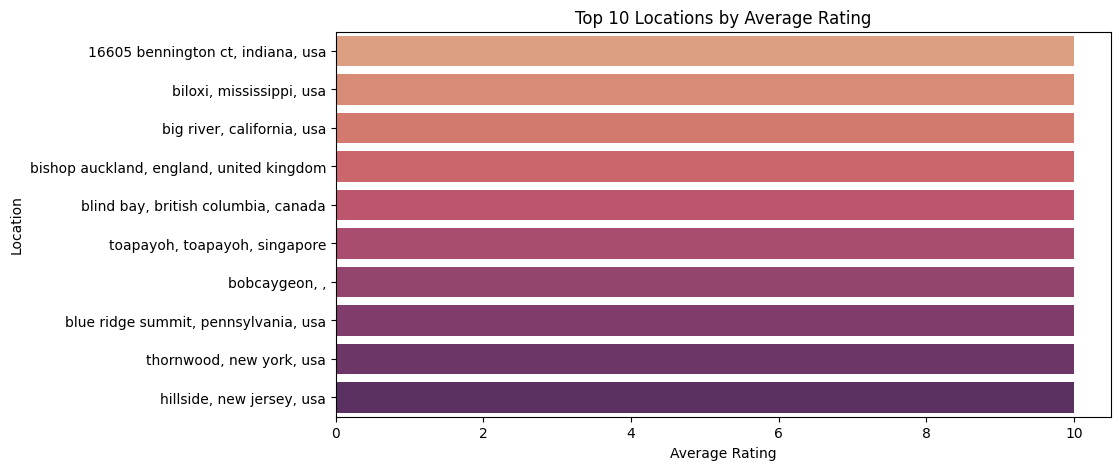

In [ ]:
avg_rating_loc = df.groupby("location")["book_rating"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(y=avg_rating_loc.index, x=avg_rating_loc.values, palette="flare")
plt.title("Top 10 Locations by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Location")
plt.show()

# Correlation Heatmap

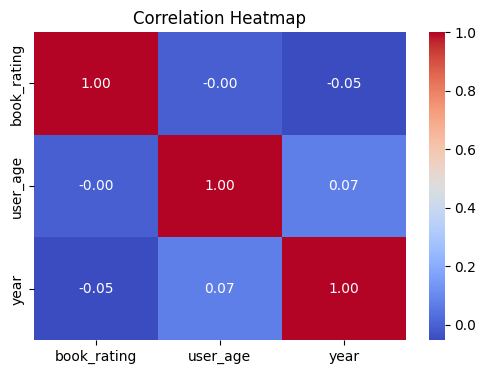

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['book_rating','user_age','year']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

#  Distribution of Ratings by Age Groups (Boxplot)

C:\Users\e\AppData\Local\Temp\ipykernel_11376\2581296430.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age_group', y='book_rating', data=df, palette="pastel")


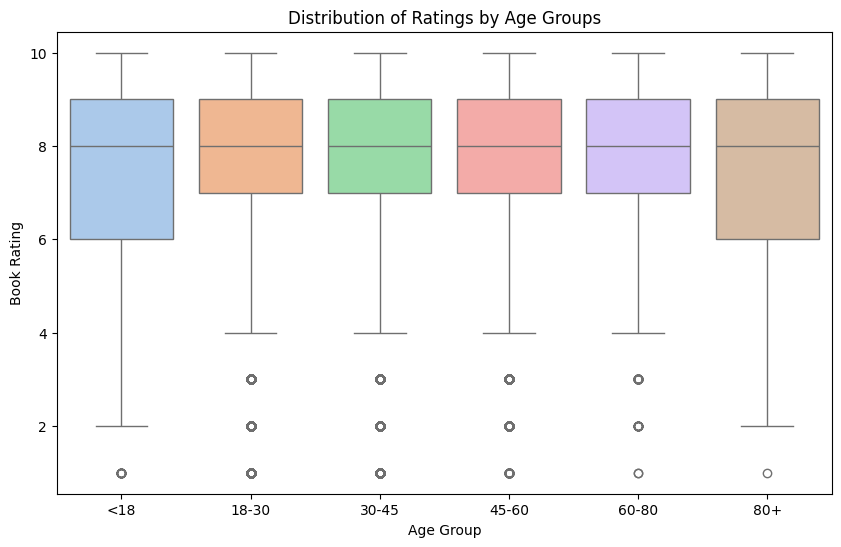

In [46]:
# Create age groups
df['age_group'] = pd.cut(df['user_age'], bins=[0,18,30,45,60,80,100], labels=['<18','18-30','30-45','45-60','60-80','80+'])

plt.figure(figsize=(10,6))
sns.boxplot(x='age_group', y='book_rating', data=df, palette="pastel")
plt.title("Distribution of Ratings by Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Book Rating")
plt.show()


# Top 15 Publishers by Number of Books (Horizontal Barplot)

C:\Users\e\AppData\Local\Temp\ipykernel_11376\3112309720.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_publishers.index, x=top_publishers.values, palette="mako")


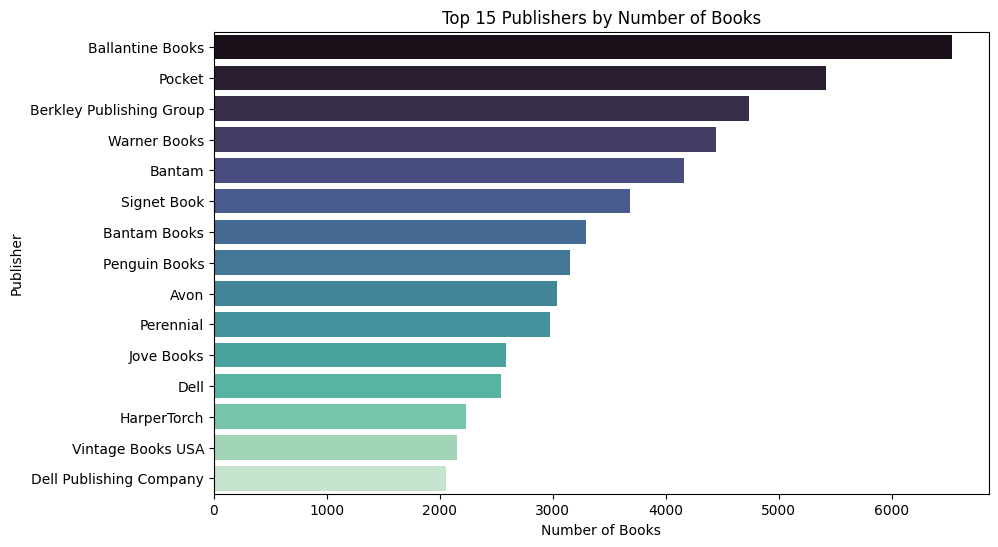

In [47]:
top_publishers = df['publisher'].value_counts().head(15)

plt.figure(figsize=(10,6))
sns.barplot(y=top_publishers.index, x=top_publishers.values, palette="mako")
plt.title("Top 15 Publishers by Number of Books")
plt.xlabel("Number of Books")
plt.ylabel("Publisher")
plt.show()


# Scatterplot: User Age vs Book Rating (with transparency)

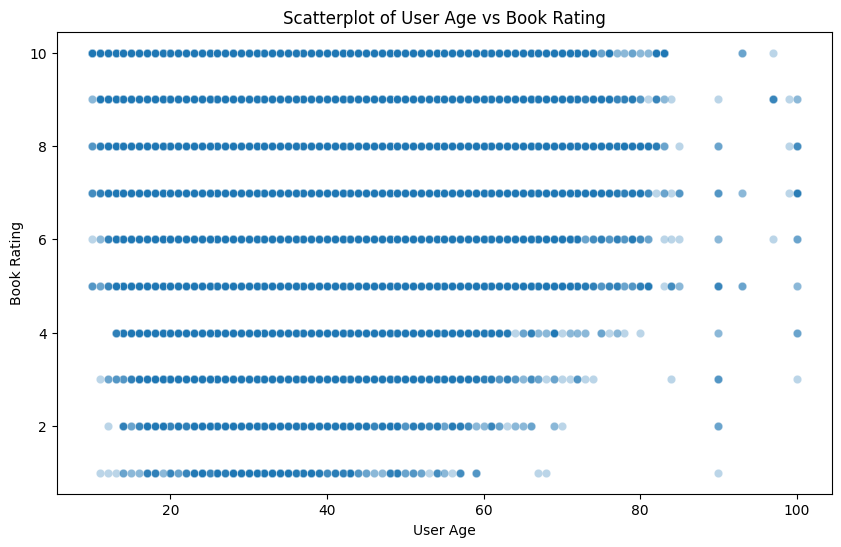

In [48]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='user_age', y='book_rating', data=df, alpha=0.3)
plt.title("Scatterplot of User Age vs Book Rating")
plt.xlabel("User Age")
plt.ylabel("Book Rating")
plt.show()
